<a href="https://colab.research.google.com/github/xxxcrttt/CASA0018----DLSN/blob/main/Workshop/2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_MINIST
[Fashion-minist](https://github.com/zalandoresearch/fashion-mnist) contains 70,000 items of clothing in 10 categories. 

Each item of clothing is a 28 x 28 greyscale image. 

## Importing dependencies  
Print out the version number and create an object that points to the data via```tf.keras``` datasets API. 

In [1]:
import tensorflow as tf 
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

2.7.0


## Loading the image data 

```load_data```
will give 2 sets of lists -- training(60000, 85%) and testing(10000, 15%), containing clothing items and their labels. 
 

In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Exploring the data and prepare 
display an image and point it to a training image, and a training label

Each of the 'pixel' values are from 0~255

shape: (28, 28)
Lable: 2


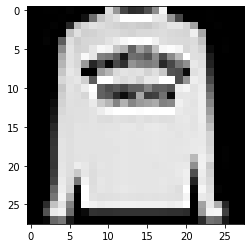

In [7]:
sample = 124;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap="gray")
print("Lable:", training_labels[sample])

To **normalize** the data between 0 and 1, just divided by 255

In [8]:
training_images = training_images / 255.0
test_images = test_images /255.0

## Building the model 
**Sequential**: 

create the sequence of layers in a model. This model has 3 layers.

1st -- **Flatten**, which takes the square image (28 x 28 pixels), turns it into 1 D set -- 将图片转换为数组

2nd -- **Dense**, has 128 neurons

3rd -- **Dense**, has 10 neurons -- related to 10 fashion categories 

**activition function** -- **ReLU**(Rectified Linear Unit) converts any negative value to 0 

**softmax** -- all the probabilities in the layer of neurons and sets the highest value to 1 and other values to 0

归一化指数函数，将含有任意实数的 K 维向量 “压缩” 到另一个 K维实向量中，使得每一个元素的范围都在 (0, 1) 之间

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

optimizer and loss funcion: 

training by calling ```model.fit``` to fit the training data to training labels

The accuracy after final apoch is: 0.9109 -- about 91% accurate in classifying the data, 


In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5025 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3738 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2954 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8792


[0.3505288362503052, 0.8791999816894531]

**model.evaluate** -- report back the loss for each, 

The accuracy is about 0.8792, 

# Exercises 

## Ex1. 

It creates a set of classifications for each of the test images, and then prints the first entry in the classifications.

### Q1 -- what do those numbers represent?
Those numbers represents the probabilities of each categories. The highest prob is 0.9896 which means that this test_image's catagory most likely is 7. 

In [21]:
classifications = model.predict(test_images)
print(classifications[12])
print(test_labels[12])

[4.9795874e-09 7.7131830e-09 1.9184705e-08 2.2185482e-08 5.3524584e-08
 9.9896026e-01 5.4202431e-08 4.9057498e-04 5.4895360e-04 6.1053825e-08]
7


## Ex 2. More neurons
* Experiment with different values for the dense layer with more neurons

* 512 neurons -- loss: 0.3450 - accuracy: 0.8779

* 1024 neurons -- training takes longer, but more accuracy, adding more Neurons means more calculations 

* loss: 0.3415 - accuracy: 0.8750

-- there's an ovrfitting problem!! 

In [26]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4692 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3579 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3215 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2990 - accuracy: 0.8880
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.8750
[4.3187765e-07 4.2574237e-09 2.2584800e-07 8.2954559e-09 3.1153414e-07
 2.2100480e-02 2.1658561e-06 9.8322332e-03 1.1062787e-06 9.6806306e-01]
9


## EX 3. Remove the Flatten() layer


In [28]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5


ValueError: ignored

## Ex 4. Final Layer

* the number of neurons in the last layer should match the number of classes you are classifying for.

In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5225
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3985
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3580
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3326
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3819
[4.1330046e-07 4.3293589e-08 7.4529041e-08 8.8653178e-06 4.6231717e-06
 3.5144120e-02 4.8999950e-06 7.4178264e-02 1.9293782e-04 8.9046568e-01]
9


## Ex 5. Additional layers 

* There isn't a significant impact! This is reletivity simple data! 

In [30]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4666
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3554
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3173
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2995
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3317
[6.7235550e-11 5.0107680e-08 7.9295251e-11 1.8291696e-09 1.2026458e-09
 5.7914871e-04 3.0268379e-09 9.7506298e-03 1.5422593e-08 9.8967022e-01]
9


## Ex 6. Epochs 

*  the impact of training for more or less epochs

* 15 epochs -- loss: 0.3526 - accuracy: 0.8840

* 30 epochs  -- loss: 0.3901 - accuracy: 0.8943

In [32]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.7.0
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4962 - accuracy: 0.8269
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8781
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8848
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8951
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.8999
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9050
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2460 - accuracy: 0.9080
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss:

## Ex 7. normalization 

* Remove the normalization? 

* Still works! But normalizing the data generally speeds up learning and leads to faster convergence.



In [33]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 4.0356 - accuracy: 0.7646
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5396 - accuracy: 0.8144
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5167 - accuracy: 0.8221
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5150 - accuracy: 0.8310
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5260 - accuracy: 0.8295
[1.5149230e-14 2.9534493e-16 3.9856308e-29 1.6606968e-15 1.9143368e-26
 2.6135573e-02 4.5759862e-21 2.5354461e-03 3.8976902e-09 9.7132897e-01]
9


## Ex 8. Callbacks! 

* stop training when reach a desired value? 

In [34]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

2.7.0
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5034 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3165 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.8999
Epoch 8/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.9034
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9038
